In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Table of Contents
 1. Introduction to Problem Statment
 2. Understanding Folder Structure
 3. Understanding Data Set
 4. Data Preparation
 5. Method1: Pixel values as features
 6. Model1: Model building using Pixel Features
 7. Method 2: HOG Features
 8. Model2: Model building using HOG Features

# 1. Introduction to Problem Statement

Malaria is one of the deadliest diseases. It is a life-threatening disease caused by parasites that are transmitted to people through the bites of infected female Anopheles mosquitoes. It is preventable and curable.


However, Malaria diagnosis involves close examination of the blood smear at 100x magnification. This is followed by a manual counting process wherein experts count the number of Red blood cells impacted by parasites. Automatic detection of Malaria from blood smear image is a scalable solution and can save a lot of hours for healthcare industry going a long way in our battle against this deadly disease. In this project, we try to identify from blood smears using deep learning to predict whether the sample is taken from an infected person.


In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 2. Understanding Folder Structure
Let us try to understand the folder structure of the dataset first before we plunge in and have a look at the dataset and blood smear images.

In [ ]:
!unzip /content/drive/MyDrive/Colab_Notebooks/Malaria_Detection_Project/images.zip

Streaming output truncated to the last 5000 lines.
 extracting: cell_images/C68P29N_ThinF_IMG_20150819_134830_cell_35.png  
 extracting: cell_images/C68P29N_ThinF_IMG_20150819_134830_cell_36.png  
 extracting: cell_images/C68P29N_ThinF_IMG_20150819_134830_cell_37.png  
 extracting: cell_images/C68P29N_ThinF_IMG_20150819_134830_cell_38.png  
 extracting: cell_images/C68P29N_ThinF_IMG_20150819_134830_cell_39.png  
 extracting: cell_images/C68P29N_ThinF_IMG_20150819_134830_cell_4.png  
 extracting: cell_images/C68P29N_ThinF_IMG_20150819_134830_cell_40.png  
 extracting: cell_images/C68P29N_ThinF_IMG_20150819_134830_cell_41.png  
 extracting: cell_images/C68P29N_ThinF_IMG_20150819_134830_cell_42.png  
 extracting: cell_images/C68P29N_ThinF_IMG_20150819_134830_cell_43.png  
 extracting: cell_images/C68P29N_ThinF_IMG_20150819_134830_cell_44.png  
 extracting: cell_images/C68P29N_ThinF_IMG_20150819_134830_cell_45.png  
 extracting: cell_images/C68P29N_ThinF_IMG_20150819_134830_cell_46.png  
 

In [ ]:
!ls

cell_images  drive  sample_data


The cell images folder contains all the images of the dataset and the file train.csv contain image names belonging to dataset and their corresponding labels i.e. Parasitized/Uninfected.
Now lets see the names of images present in our dataset.

In [ ]:
!ls cell_images/

Streaming output truncated to the last 5000 lines.
C68P29N_ThinF_IMG_20150819_134830_cell_36.png
C68P29N_ThinF_IMG_20150819_134830_cell_37.png
C68P29N_ThinF_IMG_20150819_134830_cell_38.png
C68P29N_ThinF_IMG_20150819_134830_cell_39.png
C68P29N_ThinF_IMG_20150819_134830_cell_3.png
C68P29N_ThinF_IMG_20150819_134830_cell_40.png
C68P29N_ThinF_IMG_20150819_134830_cell_41.png
C68P29N_ThinF_IMG_20150819_134830_cell_42.png
C68P29N_ThinF_IMG_20150819_134830_cell_43.png
C68P29N_ThinF_IMG_20150819_134830_cell_44.png
C68P29N_ThinF_IMG_20150819_134830_cell_45.png
C68P29N_ThinF_IMG_20150819_134830_cell_46.png
C68P29N_ThinF_IMG_20150819_134830_cell_47.png
C68P29N_ThinF_IMG_20150819_134830_cell_48.png
C68P29N_ThinF_IMG_20150819_134830_cell_49.png
C68P29N_ThinF_IMG_20150819_134830_cell_4.png
C68P29N_ThinF_IMG_20150819_134830_cell_50.png
C68P29N_ThinF_IMG_20150819_134830_cell_51.png
C68P29N_ThinF_IMG_20150819_134830_cell_52.png
C68P29N_ThinF_IMG_20150819_134830_cell_53.png
C68P29N_ThinF_IMG_20150819_1348

In [ ]:
#Storing the base directory
import os

base_dir = os.path.join('./cell_images')

# 3. Understanding Data Set

First of all, let's set the base directory for reading images as all the images of the dataset are present in this directory.

In [ ]:
import numpy as np
import pandas as pd

Now lets import the train.csv and look at its contents.

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Malaria_Detection_Project/train.csv')
train_df.shape

(19290, 2)

In [ ]:
train_df.head()

,filename,label
0,C50P11thinF_IMG_20150724_114951_cell_148.png,malaria
1,C112P73ThinF_IMG_20150930_131659_cell_94.png,healthy
2,C59P20thinF_IMG_20150803_111333_cell_144.png,malaria
3,C158P119ThinF_IMG_20151115_181136_cell_202.png,malaria
4,C81P42ThinF_IMG_20150817_120524_cell_190.png,malaria


In [ ]:
#understand the distribution of both classes in the training data set
train_df['label'].value_counts()

malaria    9645
healthy    9645
Name: label, dtype: int64

From the above cell we can observe that our train set consists of equal samples of both the classes thus we will not face any problem due to class imbalance in the dataset.


<Figure size 1500x1500 with 0 Axes>

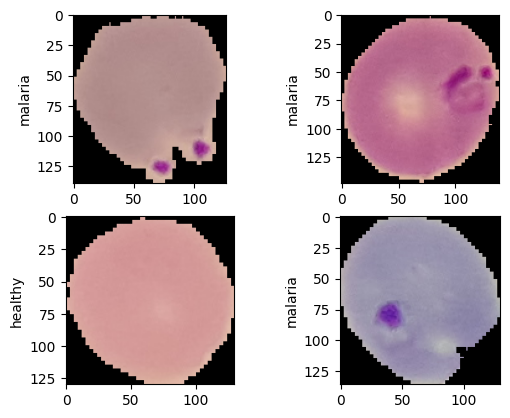

In [ ]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow

plt.figure(figsize=(15,15))
fig, ax = plt.subplots(nrows=2, ncols=2)

for i in range(2):
    for j in range(2):
        #Reading files after concatenating file name with folder path
        image = imread(os.path.join(base_dir,train_df["filename"][i+2*j]))
        #showing some images of the dataset
        ax[i,j].imshow(image)
        ax[i,j].set_ylabel(train_df["label"][i+2*j])

# 4. Data Preparation

1. since we have textual labels for our images i.e. Parasitized/Uninfected so we will convert them to numerical labels i.e. 0/1

In [ ]:
from sklearn import preprocessing

#create the LabelEncoder object
le = preprocessing.LabelEncoder()

# Fit label Encoder
le.fit(train_df['label'])

#transform textual labels
labels = le.transform(train_df['label'])

2. Here we split the dataset into training and validation sets.
Training set is the subset of the dataset that is used for training and validation set is used to evaluate the performance of the model after every epoch.

In [ ]:
#import required functions
from sklearn.model_selection import train_test_split

#divide the dataset into training and validation sets
train_files, val_files, train_labels, val_labels = train_test_split(train_df['filename'],
                                                                    labels,
                                                                    test_size=0.2, random_state=42,shuffle=True)
#check the shapes of training and validation sets
print(train_files.shape, val_files.shape)
print(train_labels.shape,val_labels.shape)

(15432,) (3858,)
(15432,) (3858,)


In [ ]:
from skimage.io import imread, imshow
from skimage.transform import resize

In [ ]:
shapes = []
for i in train_df['filename']:
    image = imread(os.path.join(base_dir,i))
    shapes.append(image.shape)

print('Minimum Dimensions - ',np.min(shapes,axis=0))
print('Maximum Dimensions - ',np.max(shapes,axis=0))
print('Average Dimensions - ',np.mean(shapes,axis=0))

Minimum Dimensions -  [40 49  3]
Maximum Dimensions -  [385 364   3]
Average Dimensions -  [132.9600311  132.58335925   3.        ]


We can see that there are images of different shapes. It is recommended to have images in shape size before going ahead with modeling process and it is also dependent on which feature extractor tool, you are using.

# 5. HOG Features

Your image size should be in 64X128(Width X Height) shape to extract HOG features from images. We will first change image shape size to 64X128 first and then extract HOG features.

In [ ]:
from skimage.feature import hog

In [ ]:
#Showing example of one image first
index= np.random.randint(0,1000)

image = imread(os.path.join(base_dir,train_files.iloc[index]))
IMG_DIMS = (128,64) # SkIMAGE takes input in HEIGHT X WIDTH format
image1 = resize(image,IMG_DIMS)
#calculating HOG features
features, hog_image = hog(image1, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

<ipython-input-66-8b95b585ffe3>:8: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(image1, orientations=9, pixels_per_cell=(8, 8),


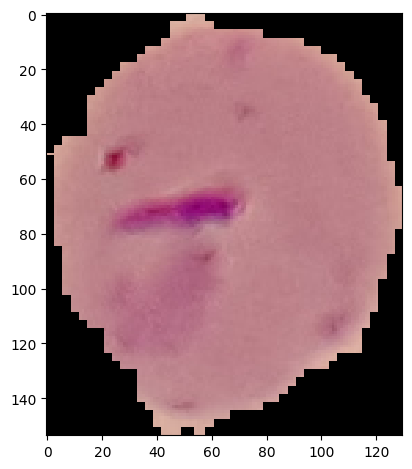

In [ ]:
#Original Image
imshow(image)

In [ ]:
image.shape

(130, 139, 3)

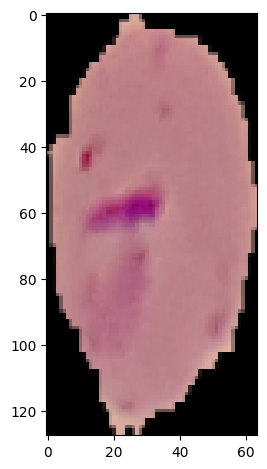

In [ ]:
#After Resize
imshow(image1)

In [ ]:
image1.shape

(128, 64, 3)

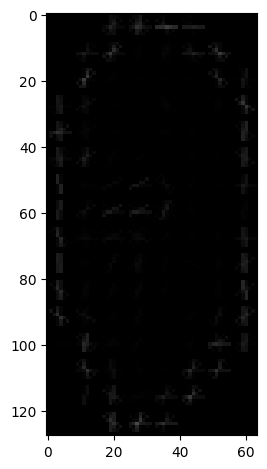

In [ ]:
#Image with HOG Image (Look At the Edges)
imshow(hog_image)

In [ ]:
hog_image.shape

(128, 64)

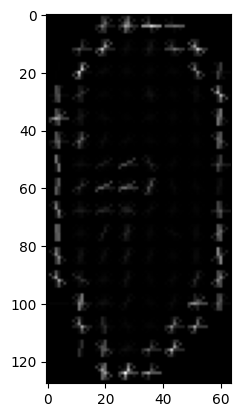

In [ ]:
#Highlighting the HOG image using Matplotlib
import matplotlib.pyplot as plt
plt.imshow(hog_image, cmap="gray")

In [ ]:
#Shape of HOG Feature Vector
features.shape

(3780,)

In [ ]:
features

array([0., 0., 0., ..., 0., 0., 0.])

## Calculate HOG features for both training and Validation images

In [ ]:
IMG_DIMS = (128,64)
#For Training Images
train_features_hog = []
for i in train_files:
    image = imread(os.path.join(base_dir,i))
    image = resize(image,IMG_DIMS)
    #calculating HOG features
    features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
    hog_features = np.reshape(features,(features.shape[0]))
    train_features_hog.append(hog_features)

train_features_hog = np.array(train_features_hog)


#For Validation Images

val_features_hog = []
for i in val_files:
    image = imread(os.path.join(base_dir,i))
    image = resize(image,IMG_DIMS)
    #calculating HOG features
    features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
    hog_features = np.reshape(features,(features.shape[0]))
    val_features_hog.append(hog_features)


val_features_hog = np.array(val_features_hog)

<ipython-input-33-e4670c6bede5>:8: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
<ipython-input-33-e4670c6bede5>:23: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),


In [ ]:
#checking the shape of the final lists after reading all the images
train_features_hog.shape, val_features_hog.shape

((15432, 3780), (3858, 3780))

In [ ]:
train_features_hog

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 6. Model Building

In [ ]:
# importing functions from keras to define the neural network architecture
from keras.layers import Dense, InputLayer, Dropout, BatchNormalization, Flatten
from keras.models import Sequential
# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam

In [ ]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

In [ ]:
# defining and compiling the model architecture
model=Sequential()
model.add(InputLayer(input_shape=(3780)))
model.add(Flatten())
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
# fits the model on batches with real-time data augmentation:
model_history = model.fit(train_features_hog, train_labels, epochs=30, batch_size=128, validation_data=(train_features_hog, train_labels))

Epoch 1/30
121/121 [==============================] - 5s 30ms/step - loss: 0.6168 - accuracy: 0.7151 - val_loss: 0.6556 - val_accuracy: 0.5481
Epoch 2/30
121/121 [==============================] - 5s 41ms/step - loss: 0.4754 - accuracy: 0.7857 - val_loss: 0.5545 - val_accuracy: 0.7874
Epoch 3/30
121/121 [==============================] - 7s 58ms/step - loss: 0.4206 - accuracy: 0.8149 - val_loss: 0.4625 - val_accuracy: 0.8252
Epoch 4/30
121/121 [==============================] - 4s 35ms/step - loss: 0.3963 - accuracy: 0.8264 - val_loss: 0.3731 - val_accuracy: 0.8462
Epoch 5/30
121/121 [==============================] - 4s 34ms/step - loss: 0.3794 - accuracy: 0.8335 - val_loss: 0.3397 - val_accuracy: 0.8605
Epoch 6/30
121/121 [==============================] - 2s 18ms/step - loss: 0.3679 - accuracy: 0.8413 - val_loss: 0.3877 - val_accuracy: 0.8173
Epoch 7/30
121/121 [==============================] - 4s 30ms/step - loss: 0.3600 - accuracy: 0.8434 - val_loss: 0.4882 - val_accuracy: 0.7643

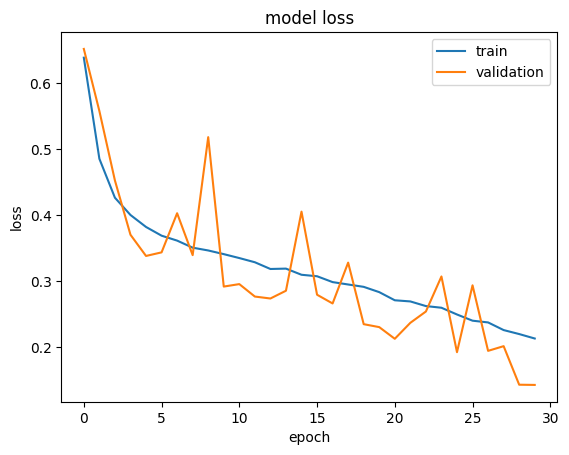

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

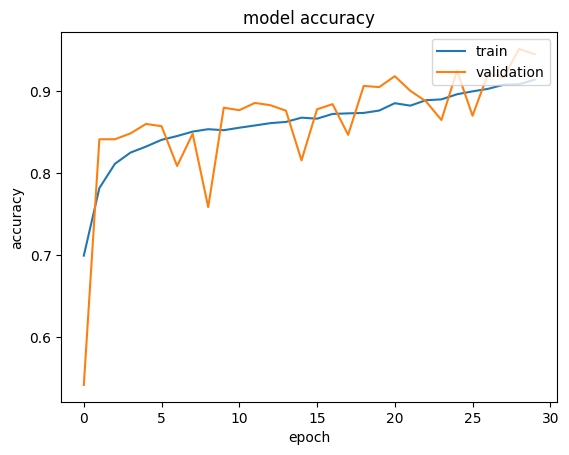

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
preditions_train = (model.predict(train_features_hog) > 0.5).astype("int32")
preditions_train

483/483 [==============================] - 1s 3ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
preditions_train = (model.predict(train_features_hog) > 0.5).astype("int32")
print("Training: Model Accuracy - ",accuracy_score(train_labels,preditions_train)*100,'%')

predictions_val = (model.predict(val_features_hog) > 0.5).astype("int32")
print("Validation: Model Accuracy - ",accuracy_score(val_labels,predictions_val)*100,'%')

483/483 [==============================] - 3s 5ms/step
Training: Model Accuracy -  93.17651632970451 %
121/121 [==============================] - 0s 3ms/step
Validation: Model Accuracy -  83.61845515811301 %


In [ ]:
# Saving the model
import pickle
pickle_out = open("Malaria_Detection.pkl", mode = "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

# **7. Deploying the machine learning model using streaml**

## **7.1 Building the Frontend of the application**

In [1]:
# installing pyngrok
!pip install -q pyngrok
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.8/731.8 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00


### Creating the frontend of the app

In [22]:
# creating the script
#%%writefile app.py

# importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
import pickle
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.feature import hog


# loading the trained model
pickle_in = open('Malaria_Detection.pkl', 'rb')
classifier = pickle.load(pickle_in)


# define prediction function
def predict(image):
  # Loading and Pre-processing the data
  features_hog = []
  IMG_DIMS = (128,64)
  ima = imread(image)
  ima = resize(ima,IMG_DIMS)
  #calculating HOG features
  features, hog_image = hog(ima, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
  hog_features = np.reshape(features,(features.shape[0]))
  features_hog.append(hog_features)
  features_hog = np.array(hog_features)
  # get prediction
  features_hog_rs = features_hog.reshape(1,3780)
  prediction = (classifier.predict(features_hog_rs) > 0.5).astype("int32")

  if prediction == 1:
        pred = 'Positive'
  else:
        pred = 'Negative'
  return pred



# define image file uploader
image = st.file_uploader("Upload image here")

# define button for getting prediction
if image is not None and st.button("Get prediction"):
    # load image using PIL
    input_image = Image.open(image)

    # show image
    st.image(input_image, use_column_width=True)

    # get prediction
    pred = predict(image)

    # print results
    "the patient is malaria ", pred

Overwriting app.py


In [23]:
# running the app
!streamlit run app.py &>/dev/null&

In [24]:
!ngrok config add-authtoken 2YoOAqdOc8A5yBqUZs3FhZbMZQ6_2pAcysiRdGn1SrmCzFK2n

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [25]:
!kill -9 "$(pgrep ngrok)"

In [26]:
# making the locally-hosted web application to be publicly accessible
from pyngrok import ngrok

public_url = ngrok.connect('8501')
public_url

<NgrokTunnel: "https://9359-34-125-62-235.ngrok-free.app" -> "http://localhost:8501">